
___
# Regresión lineal con scikit -learn

Su vecina es una agente de bienes raíces y quiere ayuda para predecir los precios de las viviendas en las regiones de EEUU. Sería genial si de alguna manera pudieras crear un modelo para ella que le permitiera poner algunas características de una casa y devolver un estimado de lo que la casa vendería.

Ella le ha preguntado si podría ayudarla con sus nuevas habilidades de ciencia de datos. ¡Usted dice que sí y decide que la Regresión lineal podría ser un buen camino para resolver este problema!

Luego, su vecino le brinda información sobre un grupo de casas en regiones de los Estados Unidos; todo está en el conjunto de datos: USA_Housing.csv.

Los datos contienen las siguientes columnas:

* 'Avg. Area Income'': Prom. Ingresos de residentes de la casa de la ciudad se encuentra en.
* 'Avg. Area House Age': Promedio de edad de las casas en la misma ciudad
* 'Avg. Area Number of Rooms': Promedio de habitaciones para casas en la misma ciudad
* 'Avg. Area Number of Bedrooms'': Promedio de habitaciones para casas en la misma ciudad
* 'Area Population': la población de la casa de la ciudad se encuentra en
* 'Price': precio que la casa vendió en
* 'Address': dirección de la casa


## Verificación de los datos
Hemos podido obtener algunos datos de los precios de vivienda de su vecino como un conjunto de csv, ¡preparemos nuestro entorno con las librerias que necesitaremos y luego importemos los datos!
### Importar módulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
#sns.set_context("paper")

### Verificando los datos

In [2]:
USAhousing = pd.read_csv('Data/USA_Housing.csv')

In [3]:
USAhousing.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [5]:
USAhousing.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [6]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Gráficas informativas



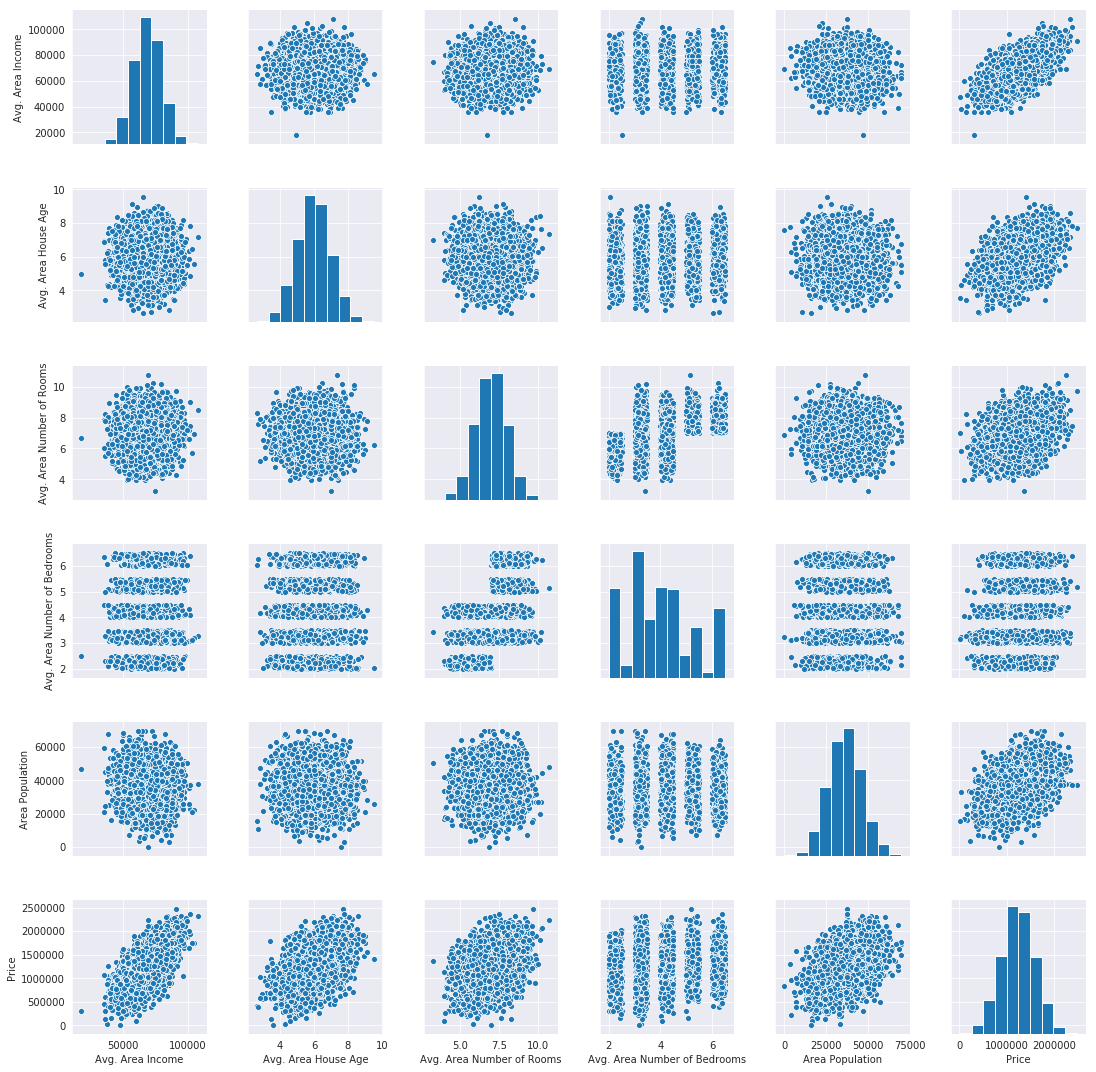

In [7]:
sns.pairplot(USAhousing)

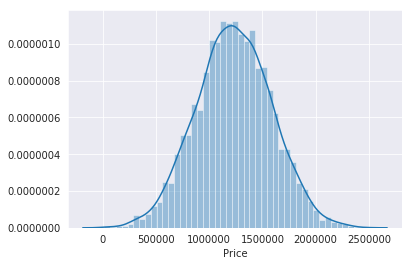

In [8]:
sns.distplot(USAhousing['Price'])

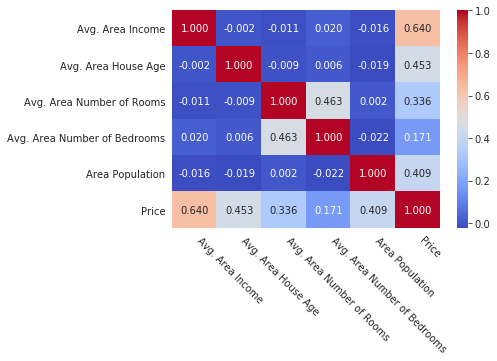

In [9]:
sns.heatmap(USAhousing.corr(),cmap='coolwarm',annot=True, fmt="1.3f")
plt.xticks(rotation=-45, ha = 'left') 
plt.show()

## Entrenando un modelo de regresión lineal

Tendremos que dividir primero nuestros datos en una matriz X que contenga los descriptores para entrenar, y una matriz con la variable respuesta, en este caso la columna ```Price```. Descartaremos la columna ```Adress``` porque solo tiene información de texto que el modelo de regresión lineal no puede usar.

### X e y

In [10]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Train Test Split

Ahora dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba. Formaremos un modelo en el conjunto de entrenamiento y luego usaremos el conjunto de prueba para evaluar el modelo.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creando y entrenando el modelo

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [16]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

## Evaluación del modelo

Evaluemos el modelo comprobando sus coeficientes e interpretándolos.

In [18]:
# print the intercept
print(lm.intercept_)

-2640159.796853739


In [19]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

Interpretando los coeficientes:


- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **Avg. Area Income** se asocia con un **incremento de \$21.52 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **Avg. Area House Age** se asocia con un **incremento de \$164883.28 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **Avg. Area Number of Room** se asocia con un **incremento de \$122368.67 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **Avg. Area Number of Bedrooms** se asocia con un **incremento de \\$2233.80 **.
- Manteniendo fijas los demás descriptores, incrementar 1 unidad en **Area Population** se asocia con un **incremento de \$15.15 **.



## Predicciones usando el modelo

¡Aprovechemos las predicciones de nuestro conjunto de pruebas y veamos qué tan bien lo hizo!

In [20]:
predictions = lm.predict(X_test)

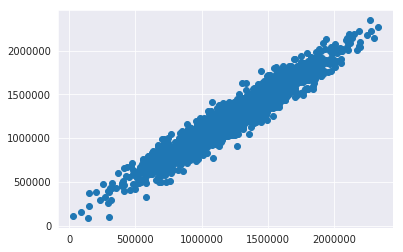

In [21]:
plt.scatter(y_test,predictions)

**Histograma de los residuos**

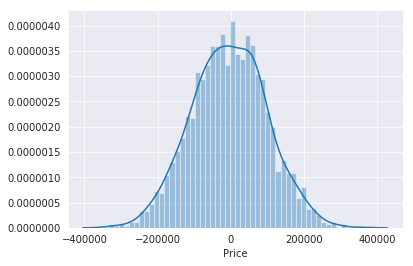

In [22]:
sns.distplot((y_test-predictions),bins=50);

## Evaluación

In [25]:
from sklearn.metrics import mean_squared_error, r2_score
n = y_test.shape[0]

In [26]:
R2 = r2_score(y_test, predictions)
MSE = mean_squared_error(y_test,predictions)
RSE = np.sqrt( MSE*n/(n-2) )

print("R^2 = {:1.3f}".format(R2) )
print("RSE = {:1.3f}".format(RSE))

R^2 = 0.918
RSE = 102330.007
